
<font size = 4 color='Orange'>
Learning Goals</font>

<font color = 'Orange' size = 3 >In this Exercise your goal is to make a good solution for the active competition on kaggle: https://www.kaggle.com/c/nlp-getting-started/data

<font color = 'Orange' size = 3 > In order to download the Datasets you will need to join and accept the terms and conditions of the competition. </font>

You need to report the parameters for the best three models into a table that will contain the model architecture and F1 score.
</font>

<font color = 'Blue' size = 4 > Structure of the Dataset </font>

<font color = 'Orange' size = 3>
The Dataset it's divided on two parts for training and testing. For the testing part you need to map the id's with the sample_submission.csv, where the target column is located.</li>
</font>

<font color = 'Blue' size = 4 >FIRST PART</font>

<font color = 'Orange' size = 3 > Choose a model that you will use from the pretrained BERT, RoBERTa, XLNet, XLM ... models for Text Classification [Hugging Face](https://huggingface.co/transformers/quicktour.html). 

Report the following parameters for models based on Transformers</font>
<ul>
<font color='orange'>
<li> Pretrained model</li>

<li>Loss function</li>
<li>Optimizer function for compiling</li>
<li>F1 score for the prediction of the test part (this is the metric for rating the models)
</li>
</ul>
<font color = 'Blue' size = 4 >SECOND PART</font>
<ul>
<font color='Orange'>
Cluster the tweets based on their embeddings using one of the clustering algorithms:

<li>K-Means Clustering</li>
<li>Agglomerative Clustering</li> 
<li>Affinity propagation Clustering</li> 
<li>Spectral Clustering</li> 
<li>DBSCAN Clustering</li>

</ul>

</font>

### Results
| model | params | training time | f1  |
|---|---|---|---|
|  finetuned distilbert | 5 epochs 2e-6 l_rate  | 4mins |0.82  |
| finetuned distilbert | 15 epochs 2e-6 l_rate  | 11mins | 0.81 |
|  finetuned bert | 10 epochs 2e-6 l_rate | 22 mins | 0.82 |

In [ ]:
import pandas as pd
import numpy as np

!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/nlp-getting-started/train.csv", index_col='id')
df.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [ ]:
df['location'].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

drop location as it does not provide much information and it is messy

In [ ]:
df = df.drop(['location'], axis=1)

see why is there missing keywords

In [ ]:
df[df['keyword'].isnull()]['target'].value_counts()

1    42
0    19
Name: target, dtype: int64

In [ ]:
df[df['keyword'].isnull()]

,keyword,text,target
id,,,
1,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
10869,NaN,Two giant cranes holding a bridge collapse int...,1
10870,NaN,@aria_ahrary @TheTawniest The out of control w...,1
10871,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


no evident relationship between the text/target and missing value. Since only 61 rows have missing values, will drop them.

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(7552, 3)

In [ ]:
df['label'] = df['target']
df = df.drop(['target'],axis=1)
df.head()

,keyword,text,label
id,,,
48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
49,ablaze,We always try to bring the heavy. #metal #RT h...,0
50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
52,ablaze,Crying out for more! Set me ablaze,0
53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


encode keyword with labelencoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['keyword'] = enc.fit_transform(df['keyword'])

In [ ]:
df.corr()

,keyword,label
keyword,1.000000,0.055841
label,0.055841,1.000000


In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
from datasets import Dataset
dataset = Dataset.from_pandas(df.drop(['keyword'], axis=1))

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True, padding=True)

In [ ]:
tokenized_tweets = dataset.map(preprocess_function, batched=True)

  0%|          | 0/8 [00:00<?, ?ba/s]

In [ ]:
tokenized_tweets.features

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 'id': Value(dtype='int64', id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
training_args = TrainingArguments(
    output_dir="./content/results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_tweets,
    tokenizer=tokenizer,
)

trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text, id. If text, id are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 7552
  Num Epochs = 10
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 4720
  Number of trainable parameters = 109483778
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than usin

Step,Training Loss
500,0.436600
1000,0.324000
1500,0.234600
2000,0.176100
2500,0.128200
3000,0.091200
3500,0.082500
4000,0.059500
4500,0.050700


Saving model checkpoint to ./content/results/checkpoint-500
Configuration saved in ./content/results/checkpoint-500/config.json
Model weights saved in ./content/results/checkpoint-500/pytorch_model.bin
tokenizer config file saved in ./content/results/checkpoint-500/tokenizer_config.json
Special tokens file saved in ./content/results/checkpoint-500/special_tokens_map.json
Saving model checkpoint to ./content/results/checkpoint-1000
Configuration saved in ./content/results/checkpoint-1000/config.json
Model weights saved in ./content/results/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in ./content/results/checkpoint-1000/tokenizer_config.json
Special tokens file saved in ./content/results/checkpoint-1000/special_tokens_map.json
Saving model checkpoint to ./content/results/checkpoint-1500
Configuration saved in ./content/results/checkpoint-1500/config.json
Model weights saved in ./content/results/checkpoint-1500/pytorch_model.bin
tokenizer config file saved in ./content/r

TrainOutput(global_step=4720, training_loss=0.16967543888900238, metrics={'train_runtime': 1309.8029, 'train_samples_per_second': 57.658, 'train_steps_per_second': 3.604, 'total_flos': 3250671311208960.0, 'train_loss': 0.16967543888900238, 'epoch': 10.0})

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/nlp-getting-started/test.csv")
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
dataset_test = Dataset.from_pandas(df_test.drop(['keyword', 'location', 'id'], axis=1))

In [ ]:
tokenized_test = dataset_test.map(preprocess_function, batched=True)

  0%|          | 0/4 [00:00<?, ?ba/s]

In [ ]:
tokenized_test.shape

(3263, 4)

In [ ]:
predictions, labels, metrics = trainer.predict(tokenized_test)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3263
  Batch size = 16


In [ ]:
np.argmax(predictions, axis=-1)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
df_test['target'] = np.argmax(predictions, axis=-1)

In [ ]:
df_test['target'].value_counts()

0    1895
1    1368
Name: target, dtype: int64

In [ ]:
df_test.drop(['keyword','location','text'],axis=1).to_csv("./content/submission-1.csv", index=False)

f1 score of 0.82 with 5 epochs, 0.81 with 15 probably started to overfit

## second part

In [ ]:
!pip install transformers
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

def embed(input):
  return model(input)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 81.4 MB/s eta 0:00:00
module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
logging.set_verbosity(logging.ERROR)
message_embeddings = embed(df.text.values)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit(message_embeddings)

clusters = km.labels_.tolist()
u_labels = np.unique(clusters)

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

data = message_embeddings
pca = PCA(2)
 
df_new = pca.fit_transform(data)

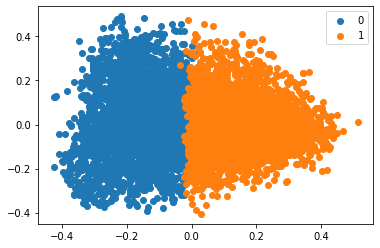

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in u_labels:
    plt.scatter(df_new[clusters == i , 0] , df_new[clusters == i , 1] , label = i)
    
plt.legend()
plt.show()
     

In [ ]:
from sklearn import metrics
print('ARI '+ str(metrics.adjusted_rand_score(df['target'], km.labels_)),
        'AMI '+ str(metrics.adjusted_mutual_info_score(df['target'], km.labels_, average_method='arithmetic')),
        'Homogenity '+ str(metrics.homogeneity_score(df['target'], km.labels_)),
        'Completeness '+ str(metrics.completeness_score(df['target'], km.labels_)),
        'V-measure '+ str(metrics.v_measure_score(df['target'], km.labels_)))

ARI 0.19479695226655083 AMI 0.1523537362206763 Homogenity 0.1535230979755496 Completeness 0.15136154346377145 V-measure 0.15243465828398434
